In [13]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [14]:
#顾客数据聚类分析
import matplotlib.colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.manifold import TSNE#降维
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score,silhouette_score

C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have

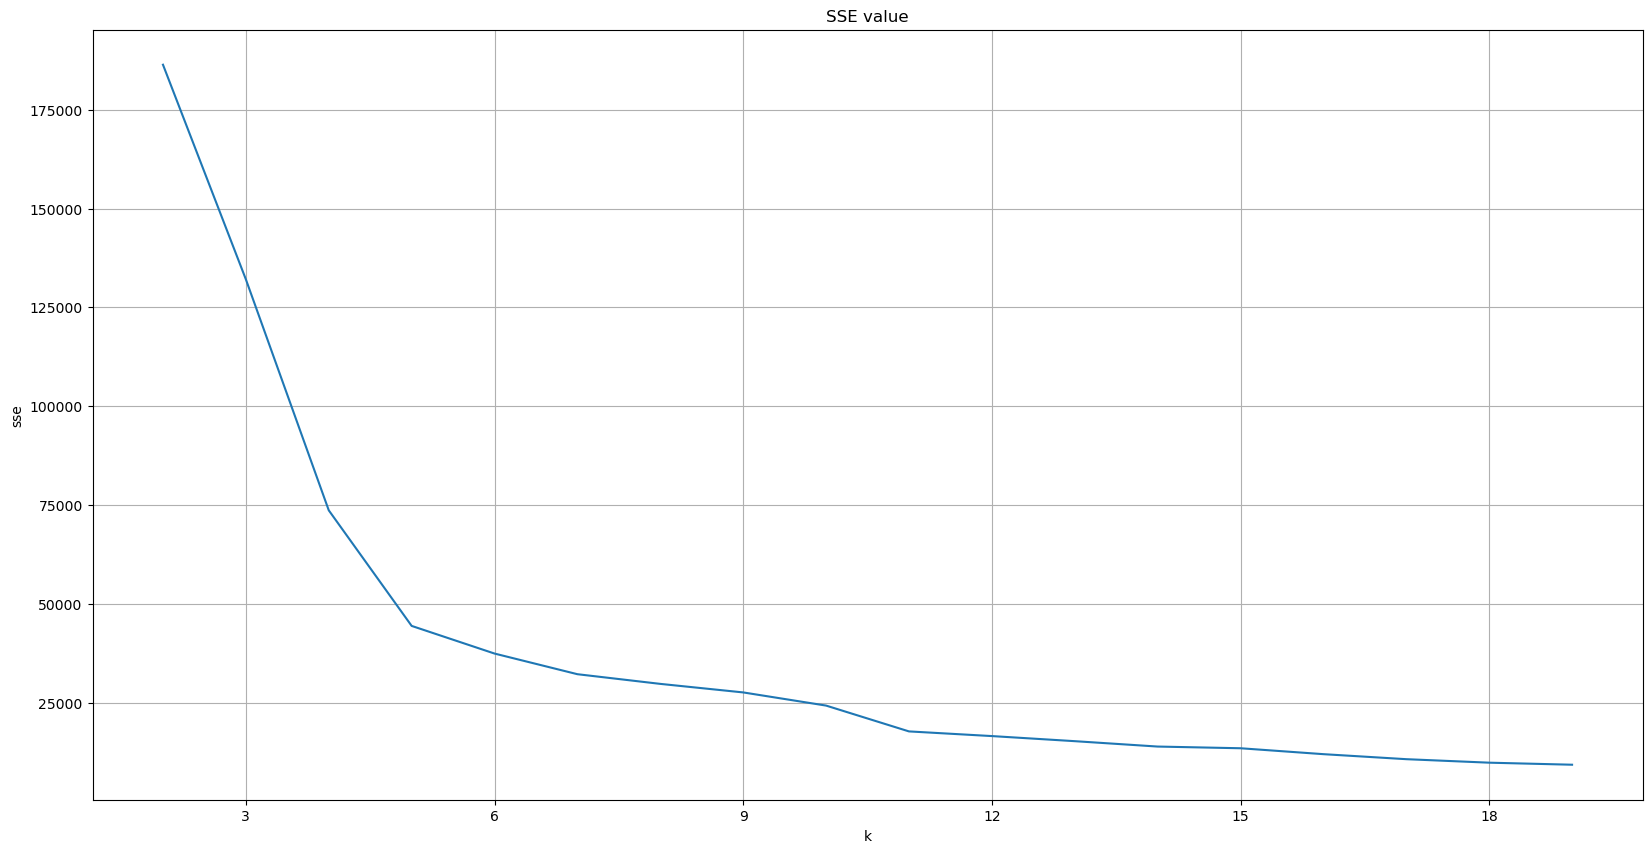

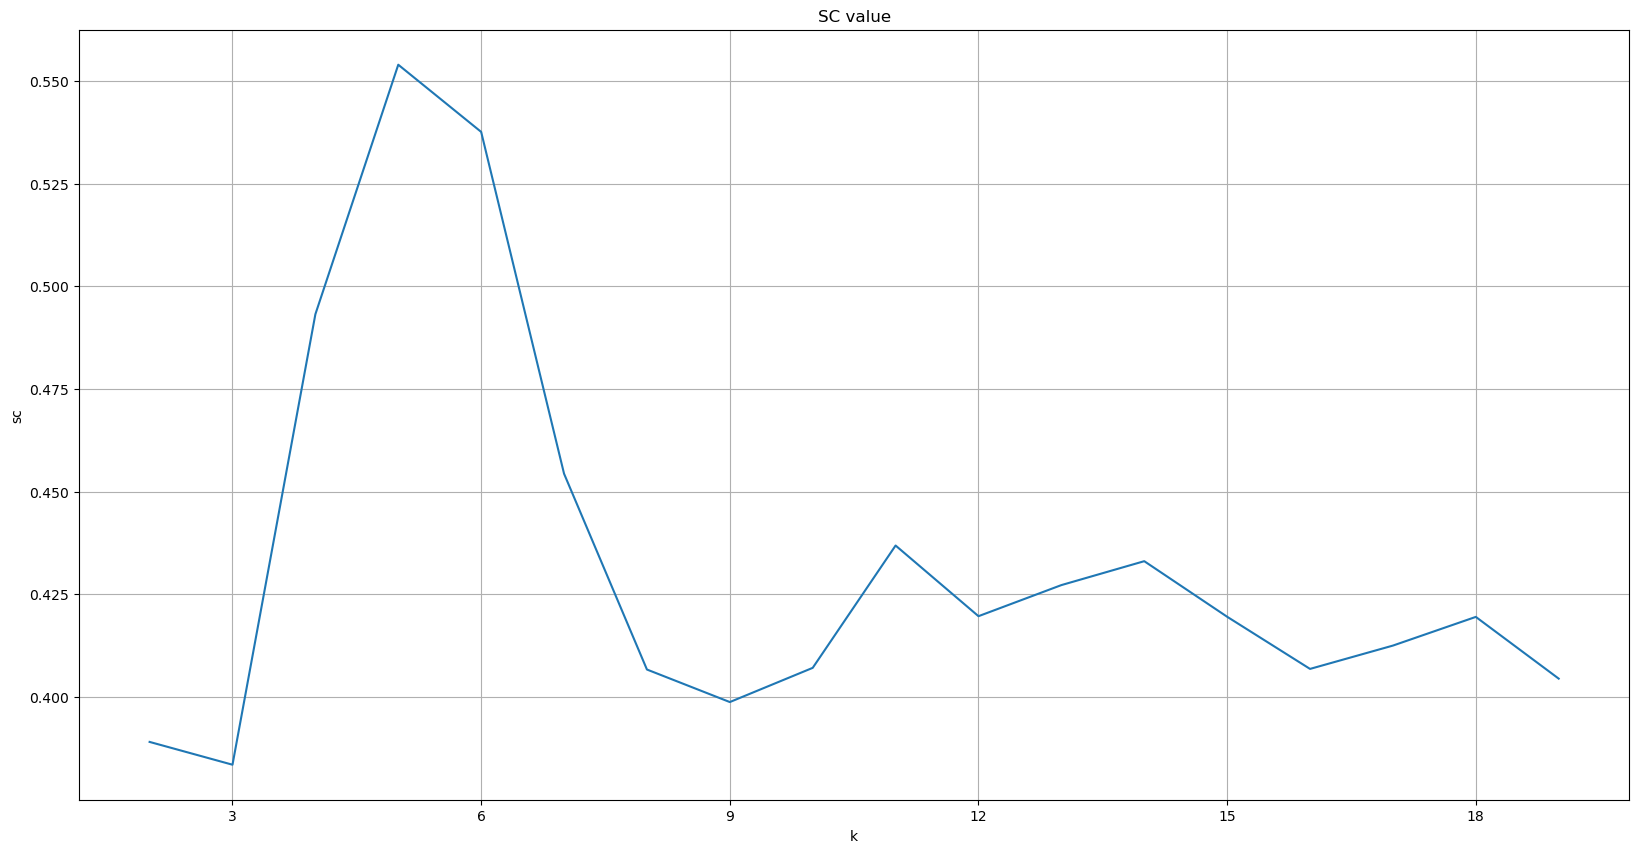

In [11]:
#找质心
def dm01():
    data = pd.read_csv('customers.csv')
    #data.info()
    #抽取特征
    x = data.iloc[:,3:5]
    #定义sse_list sc_list
    sse_list = []
    sc_list = []
    #定义循环
    for k in range(2,20):
        estimator = KMeans(n_clusters=k,max_iter=100,random_state=23)
        estimator.fit(x)
        y_pred = estimator.predict(x)
        sse_list.append(estimator.inertia_)
        sc_list.append(silhouette_score(x,y_pred))
    plt.figure(figsize=(20,10))
    plt.title('SSE value')
    plt.xticks(range(0,20,3))
    plt.xlabel('k')
    plt.ylabel('sse')
    plt.grid()#网格
    plt.plot(range(2,20),sse_list)
    plt.show()   
    plt.figure(figsize=(20,10))
    plt.title('SC value')
    plt.xticks(range(0,20,3))
    plt.xlabel('k')
    plt.ylabel('sc')
    plt.grid()#网格
    plt.plot(range(2,20),sc_list)
    plt.show()  
dm01()

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


C:\Users\Lenovo\.conda\envs\DL\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


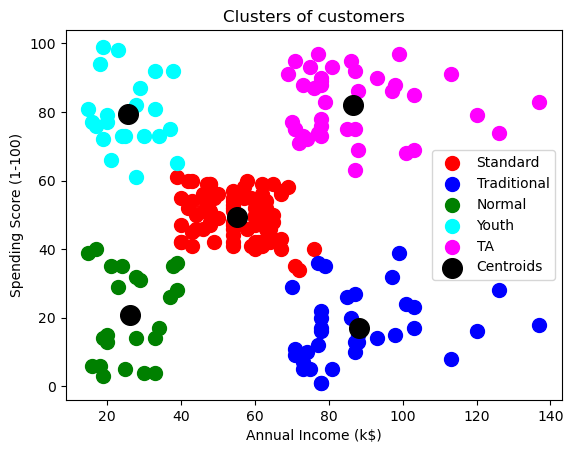

In [23]:
def dm02():
    data = pd.read_csv('customers.csv')
    #data.info()
    #抽取特征
    x = data.iloc[:,3:5]
    estimator = KMeans(n_clusters=5,max_iter=100,random_state=23)
    y_pred = estimator.fit_predict(x)
    print(y_pred)
    #绘制图像
    plt.scatter(x.values[y_pred == 0, 0], x.values[y_pred == 0, 1], s=100, c='red', label='Standard') 
    plt.scatter(x.values[y_pred == 1, 0], x.values[y_pred == 1, 1], s=100, c='blue', label='Traditional')  
    plt.scatter(x.values[y_pred == 2, 0], x.values[y_pred == 2, 1], s=100, c='green', label='Normal')  
    plt.scatter(x.values[y_pred == 3, 0], x.values[y_pred == 3, 1], s=100, c='cyan', label='Youth')
    plt.scatter(x.values[y_pred == 4, 0], x.values[y_pred == 4, 1], s=100, c='magenta', label='TA')
    #$绘制质心
    plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1], s=200, c='black', label='Centroids')
    
    plt.title('Clusters of customers')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')   
    plt.legend(loc = 'best') 
    plt.show()
dm02()    